# Matplotlib

In this notebook, we introduce the basics of matplotlib so that you can easily visualize data and their relationships. Afterwards, you will solve some exercises to get familiar with the library.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import requests
import PIL

## Dataset

We start by creating a simple dataset. As an exercise we do this by using Numpy functions. First we generate an x-axis:

In [26]:
x_val = np.arange(0, 10, 0.1)

Then we create a new array that is just the cosine of ```x_val```:

In [27]:
y_val = np.cos(x_val)

## Line plot

Those two arrays are all we need to create the simplest possible plot of a function ```y_val = cos(x_val)```. The first thing that we have to do is to **create a figure object and an axis object** with Matplotlib. The figure object can contain many elements (imagine for example a grid of plots), while the axis object contains a specific plot. We can get a figure and and an axis using the ```subplots()``` function:

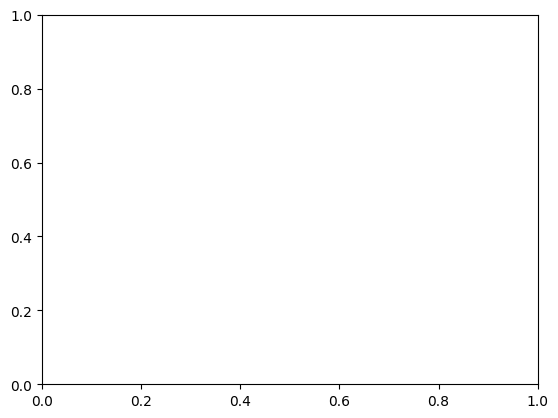

In [28]:
fig, ax = plt.subplots()
plt.show()

As you see above this produces a blank figure that we need to fill. As all the variables that we have seen until now (Numpy arrays, Pandas dataframe) the ```fig``` and ```ax``` objects have specific functions attached to them. ```ax``` in particular has all the plotting functions attached to it. In particular the simple ```plot()``` function, which takes two arguments: x values and y values: 

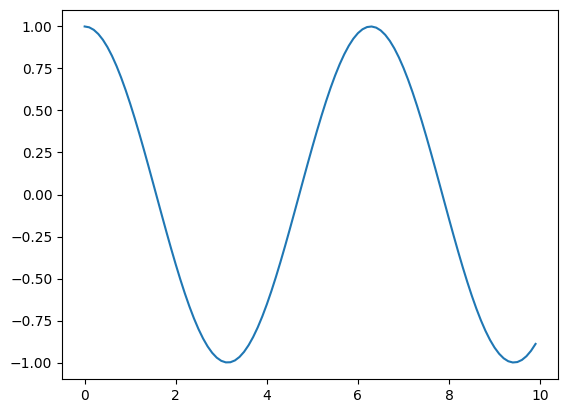

In [29]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val)
plt.show()

That's it, we have our plot! We can easily add more data to it by just calling more times the ```ax.plot``` function. For example we can generate a new y signal for the sine:

In [30]:
y_val2 = np.sin(x_val)

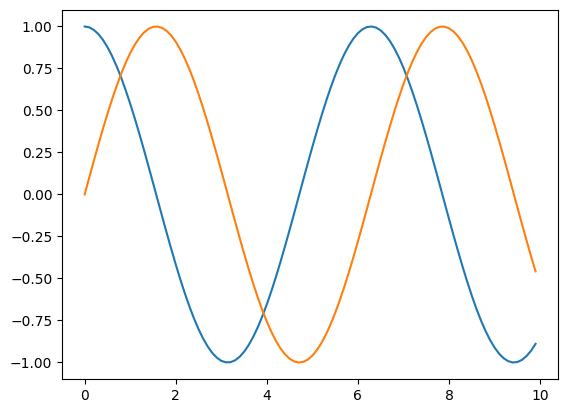

In [31]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val)
ax.plot(x_val, y_val2)
plt.show()

### Adjusting the plot
Let's adjust this plot. In the plot above we see two continuous functions, sine and cosine, but where are the actual data points that were used to create this plot? We can show them by specifying the line/marker type that we want to use:

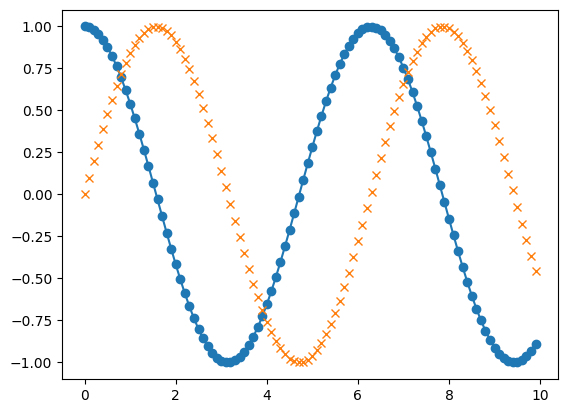

In [32]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'-o')
ax.plot(x_val, y_val2,'x')
plt.show()

The `-o` above means that we want the data points to be represented by a circle, but we still want to show the line that connects our data points. Next, let's change the colors of our lines. Matplotlib has a variety of [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) that can be used in plots, but you can also define your own colors in [different ways](https://matplotlib.org/stable/users/explain/colors/colors.html), for example by using *hexadecimal color codes* such as `#FAC301`:

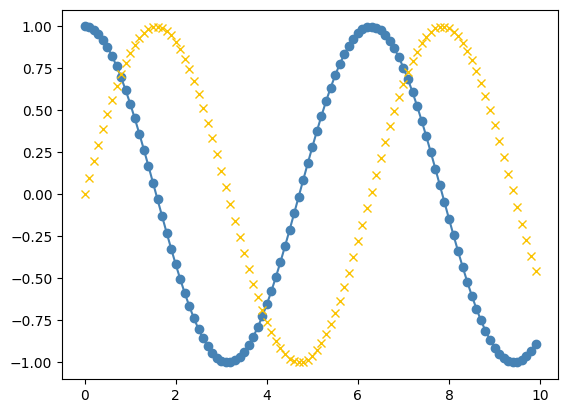

In [33]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'-o', color='steelblue')
ax.plot(x_val, y_val2, 'x', color='#FAC301')
plt.show()

Now let's give the plot a title and a legend. We use the `label` parameter when plotting the different data points to describe what text should appear in the legend. The title of the plot can be set using the `set_title` function on the axis:

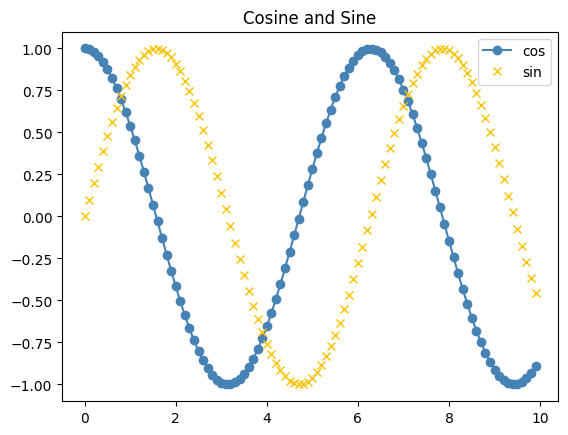

In [37]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'-o', color='steelblue', label='cos')
ax.plot(x_val, y_val2, 'x', color='#FAC301', label='sin')
ax.set_title('Cosine and Sine')
ax.legend(loc='upper right')
plt.show()

Since cosine and sine are trigonometric functions, we want to change the numbers on the x-axis to something more meaningful. We can use the `set_xticks` function on the axis to set the x values where ticks should appear. If we want the corresponding label of each tick to say something other than just the x-value at that specific tick, we can use `set_xticklabels`, where we provide a list of labels for the x-ticks (should be the same number of labels as there are ticks).

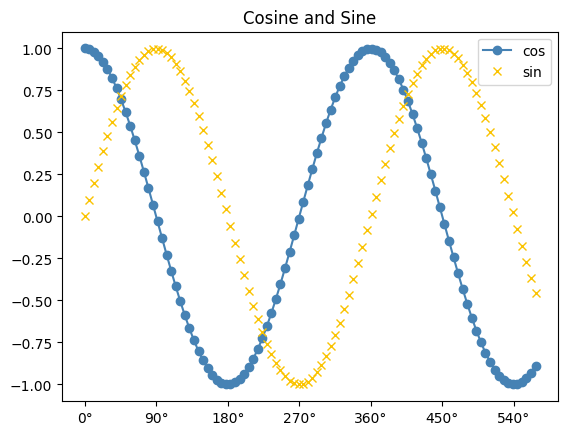

In [38]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'-o', color='steelblue', label='cos')
ax.plot(x_val, y_val2, 'x', color='#FAC301', label='sin')
ax.set_title('Cosine and Sine')
ax.legend(loc='upper right')

# Set an x-tick every 90° (corresponding to PI/2)
ax.set_xticks([i * math.pi / 2 for i in range(7)])

# For better readability, change the x-tick labels
ax.set_xticklabels([f"{i}°" for i in range(0, 541, 90)])

plt.show()

Finally, to complete our first plot, we want to add a grid so that we can better trace individual data points to their corresponding x and y values. Moreover, we will add labels to our x- and y-axis:

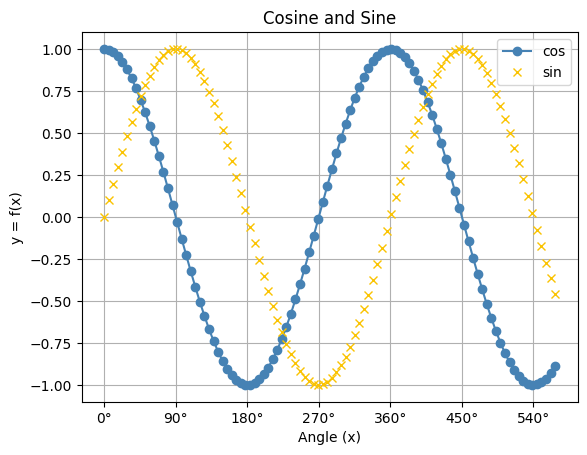

In [39]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'-o', color='steelblue', label='cos');
ax.plot(x_val, y_val2, 'x', color='#FAC301', label='sin');
ax.set_title('Cosine and Sine')
ax.legend(loc='upper right')

# Set an x-tick every 90° (corresponding to PI/2)
ax.set_xticks([i * math.pi / 2 for i in range(7)])

# For better readability, change the x-tick labels
ax.set_xticklabels([f"{i}°" for i in range(0, 541, 90)])

ax.grid()
ax.set_xlabel('Angle (x)')
ax.set_ylabel('y = f(x)')

plt.show()

## Bar charts

Let's take a look on how to create a [bar chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Bar charts are useful for:

- Comparing categorical data
- Visualizing counts or frequencies
- Showing proportions across categories
- Highlighting differences between groups
- Displaying trends over discrete time periods

In this example, we will look at the population count in Switzerland and its neighboring countries.

In [40]:
population_counts_df = pd.read_xml('https://api.worldbank.org/v2/country/ch;de;at;fr;it;li/indicator/SP.POP.TOTL?date=2023', parser='etree')
population_counts_df

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"Population, total",Austria,AUT,2023,9131761,NaN,NaN,0
1,"Population, total",Switzerland,CHE,2023,8888093,NaN,NaN,0
2,"Population, total",Germany,DEU,2023,83280000,NaN,NaN,0
3,"Population, total",France,FRA,2023,68287487,NaN,NaN,0
4,"Population, total",Italy,ITA,2023,58993475,NaN,NaN,0
5,"Population, total",Liechtenstein,LIE,2023,39850,NaN,NaN,0


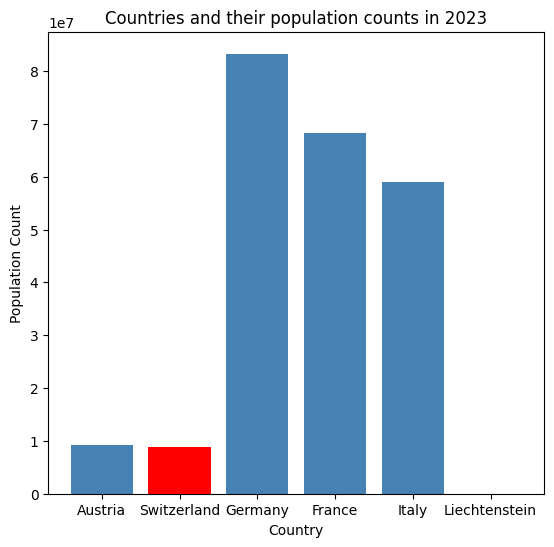

In [41]:
countries = population_counts_df.country.tolist()
population_counts = population_counts_df.value.tolist()

fig, ax = plt.subplots()

fig.set_figheight(6)

ax.bar(countries, population_counts, color=['red' if country == 'Switzerland' else 'steelblue' for country in countries])

ax.set_title('Countries and their population counts in 2023')
ax.set_xlabel('Country')
ax.set_ylabel('Population Count')

plt.show()

As you can see, Matplotlib automatically adjusted the y-axis ticks to be a multiple of 1e7, i.e. the y-values have to be multiplied by 10M to get the actual values. Internally, Matplotlib chose `MultipleLocator` as the [tick locator](https://matplotlib.org/stable/api/ticker_api.html) with a base 1e7. However, we'd like to use a base of 1e6, which will give us a y values in millions rather than ten millions. Additionally, we should provide a formatting function for the y-axis that will add an *M* after each value so that we know we are talking about millions. Let's change that!

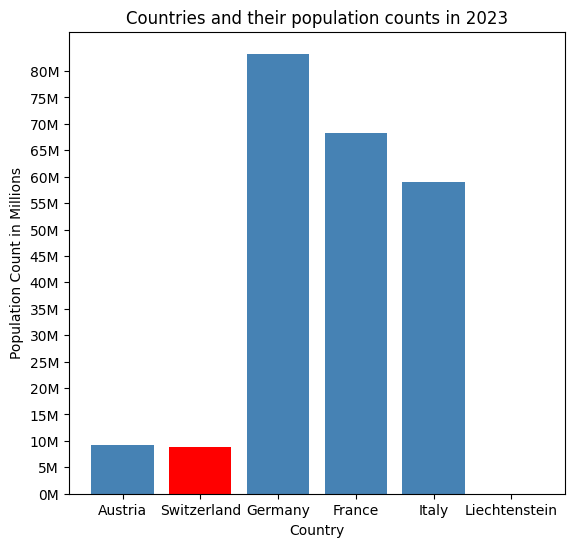

In [44]:
import matplotlib.ticker as ticker

countries = population_counts_df.country.tolist()
population_counts = population_counts_df.value.tolist()

fig, ax = plt.subplots()

fig.set_figheight(6)

ax.bar(countries, population_counts, color=['red' if country == 'Switzerland' else 'steelblue' for country in countries])

# Set y-axis ticks at 1M (1e6) intervals
ax.yaxis.set_major_locator(ticker.MultipleLocator(1_000_000))

# Set y-ticks to be at 5M steps
ax.set_yticks(np.arange(0, max(population_counts), 5e6))

# Format y-axis labels to be more readable (in Millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

ax.set_title('Countries and their population counts in 2023')
ax.set_xlabel('Country')
ax.set_ylabel('Population Count in Millions')

plt.show()

## Heatmaps

Now we are going to look at another type of graph, the heatmap. Heatmaps are useful for:

- Visualizing correlations between variables  
- Identifying patterns in large datasets  
- Highlighting intensity variations across a grid  
- Comparing values in a matrix format  
- Detecting clusters or anomalies in data  

Use heatmaps when you need a **color-coded representation** of numerical relationships. 

First we will introduce helper functions that will allow us to fetch weather forecasts. You could also do this with a static dataset of course, but to make it a little bit more interesting we will use actual weather data for tomorrow.

In [45]:
def get_latitude_and_longitude(city: str) -> tuple[float, float]:
    """Helper function that can be used to get the latitude and longitude of a city in Bern using the Open Meteo API."""
    response = requests.get(f"https://geocoding-api.open-meteo.com/v1/search?name={city},Switzerland").json()
    data = response["results"][0]
    return data["latitude"], data["longitude"]


def get_forecast(city: str) -> list[float]:
    """Fetches the weather forecast for a given city for the next day and returns a list of temperatures for each hour starting 0:00 and ending 23:00."""
    lat, long = get_latitude_and_longitude(city)
    response = requests.get(f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={long}&hourly=temperature_2m&forecast_days=1").json()
    return response["hourly"]["temperature_2m"]

In [46]:
cities = ["Bern", "Zurich", "Lucerne", "Geneva"]
hours = range(0, 24)

temperatures = []
for city in cities:
    temperatures.append(get_forecast(city))

Now we have the weather forecasts for Bern, Zurich, Lucerne, and Geneva. The temperatures are stored within a list of lists that represents a matrix. Each row (inner list) are the temperatures for one city, while each column (index within each list) corresponds to a specific hour of the day. Let's visualize that using the `imshow` function. You might wonder why it is called `imshow` and not heatmap. The reason behind it is that we are essentially generating a matrix with colored cells, which is exactly what an image is, a matrix of pixels where each pixel value corresponds to a color value/ intensity. When we will look at the Seaborn library later, we will see that it is called `heatmap` there because Seaborn focuses on statistical plots,

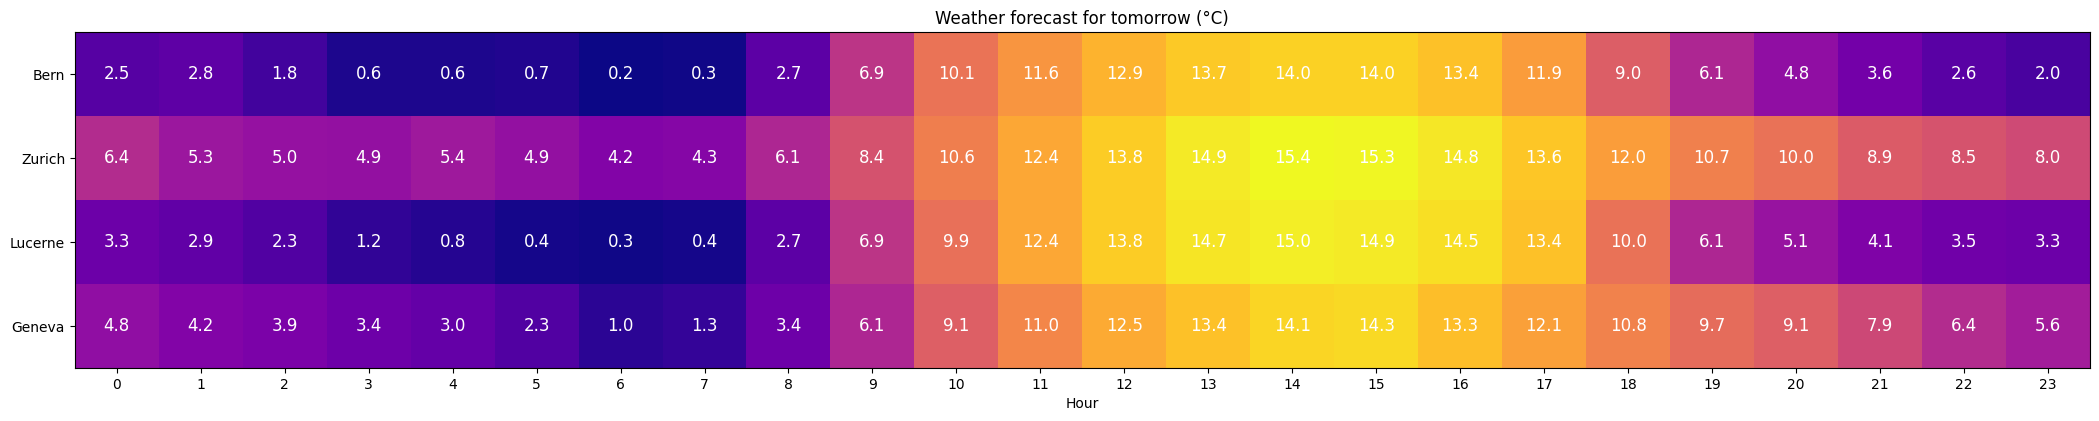

In [47]:
fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(26)

ax.imshow(temperatures, cmap="plasma")

ax.set_xticks(range(0, 24))
ax.set_yticks(range(0, len(cities)))
ax.set_yticklabels(cities)

ax.set_title('Weather forecast for tomorrow (°C)')
ax.set_xlabel('Hour')

for y in range(len(hours)):
    for x in range(len(cities)):
        text = ax.text(y, x, temperatures[x][y], ha="center", va="center", color="white", fontsize=12)

plt.show()

## Plot Types

There are many other [plot types](https://matplotlib.org/stable/plot_types/index.html) that you can use with Matplotlib. We will have a look at them in the exercises at the end of this notebook and inf the notebook about Seaborn. 

## Multiple Plots

Sometimes you might want to create multiple plots within one figure. To do so, you can specify the number of rows and columns that your figure should have within the `plt.subplots` function:

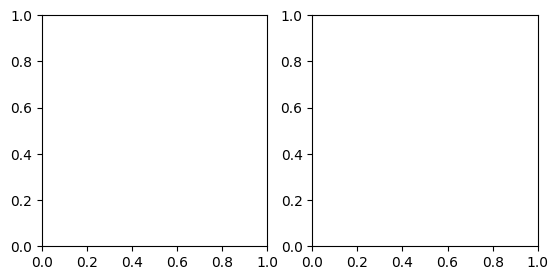

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(3)
plt.show()

Above we created a figure consisting of two plots in the same (single) row. The `axes`, i.e. the second return value of `plt.subplot` is now a list of axes. We can also directly unpack and use them:

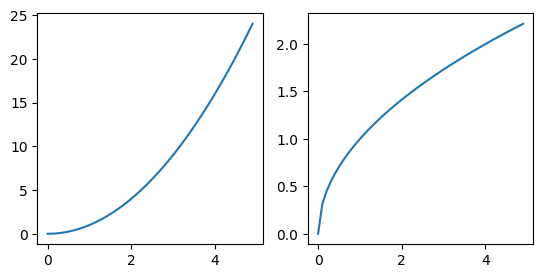

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(3)

ax1.plot(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1) ** 2)
ax2.plot(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1) ** 0.5)

plt.show()

We can also make the two plots share the same y axis, which might be better for comparison depending on what you want to tell with your plots. To do so, set `sharey` parameter to true in `plt.subplots`:

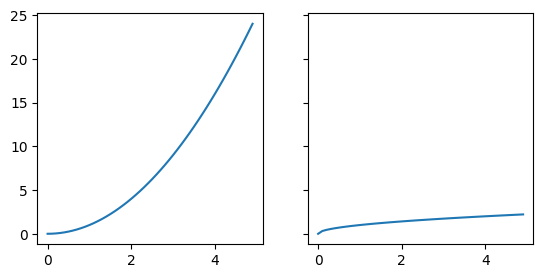

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_figheight(3)

ax1.plot(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1) ** 2)
ax2.plot(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1) ** 0.5)

plt.show()

You can add as many rows and columns as desired. Let's make a figure with 9 plots divided into a grid with 3 rows and 3 columns as an example. To make things more fun, we use the `get_cat` function implemented below and plot the returned images using `ax.imshow`.

In [51]:
def get_cat(image_size: tuple[int] = (256, 256)) -> PIL.Image:
    """Returns a preprocessed image of a cat."""
    # Get the cat
    cat = PIL.Image.open(requests.get('https://cataas.com/cat', stream=True).raw)

    # Preprocess the cat
    width, height = cat.size
    min_length = min(width, height)
    x_offset = (width - min_length) // 2
    y_offset = (height - min_length) // 2
    cat = cat.crop((x_offset, y_offset, width - x_offset, height - y_offset))
    cat = cat.resize(image_size)
    
    return cat

In [52]:
cats = [get_cat() for _ in range(9)]

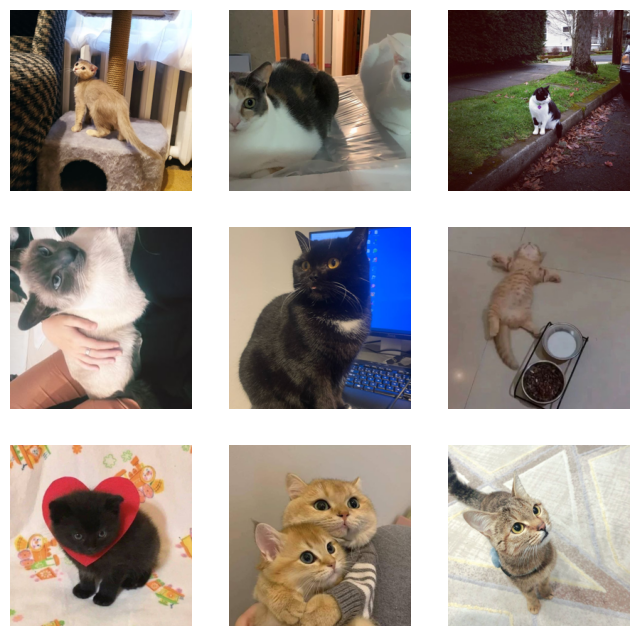

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figwidth(8)
fig.set_figheight(8)

for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        # Plot the cat images
        axes[row][col].imshow(cats[row*3+col])

        # Hide all visual components of the x- and y-axis
        axes[row][col].set_axis_off()

plt.show()

## Exercises

### 1. Pie Chart Analysis
Create a **pie chart** showing the proportion of different transportation methods used in Switzerland. Assume the following data:

- Car: 45%
- Public Transport: 30%
- Bicycle: 15%
- Walking: 10%

Your plot should:
- Display the percentage values on the chart.
- Use distinct colors for each category.
- Highlight the most common mode of transport by "exploding" that section.
- Ensure the plot has a title.

📌 *Hint: Look up `plt.pie()` in the Matplotlib documentation!*

---

### 2. Enhanced Bar Chart
Use a dataset of your choice (or generate one using `numpy` and `pandas`) and create a **bar chart** comparing five different categories. The bar chart should:
- Highlight one specific category by using a different color.
- Modify the y-axis ticks to be more readable (e.g., format large numbers with `M` or `K`).
- Rotate the x-axis labels if necessary.

---

### 3. Histogram of Random Data
Generate **a histogram** of 1000 random numbers drawn from a **normal distribution** with a mean of 50 and a standard deviation of 15.  

Your plot should:
- Use `numpy.random.normal()` to generate the data.
- Use **20 bins** for better visualization.
- Overlay a vertical **mean line** on the histogram.
- Use proper axis labels and a title.

📌 *Hint: Check `ax.axvline()` to add a vertical line.*

---

### 4. Multiple Subplots with Shared Axes
Create a **2x2 grid of subplots** showing different mathematical functions:
- **Top-left:** $y = x^2$
- **Top-right:** $y = \sqrt{x}$
- **Bottom-left:** $y = \sin(x)$
- **Bottom-right:** $y = \cos(x)$

Ensure that:
- The x-axis is shared across all plots.
- The y-axis is shared across two plots where it makes sense.
- Each subplot has a unique color and marker style.

